# EDA on Car Sales Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Dataset](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis Based on Car Brand**](#section501)<br>
    - 5.1.1 [Which are the Top 10 Brands based on car volume?](#section50101)<br>
    - 5.1.2 [What is the Market Share of the Top 30 Brands?](#section50102)<br>
    - 5.1.3 [Comparison between the Prices for the Top 5 Brands (by Volume).](#section50103)<br>
    - 5.1.4 [How does distribution vary based on Body Type for two brands in the Top 5?](#section50104)<br>
    - 5.1.5 [Categorization on Engine Type for the Top 5 Brands (by Volume).](#section50105)<br><br>
  - 5.2 [**Analysis Based on Car Price**](#section502)<br>
      - 5.2.1 [Which are the 10 Car Brands with the Most Expensive Fleet of Cars?](#section50201)<br>
      - 5.2.2 [Which is the Costliest and the Cheapest Car Model?](#section50202)<br>
      - 5.2.3 [Study of Price Vs Mileage](#section50203)<br>
      - 5.2.4 [Study of Price Vs Engine Volume](#section50204)<br>
      - 5.2.5 [Study of Price Vs Year of Production](#section50205)<br> 
      - 5.2.6 [How is the Price Distribution of Cars for each Drive Category?](#section50206)<br> 
      - 5.2.7 [How is the Price Distribution of Budget Hatchbacks based on Engine Type?](#section50207)<br>
      - 5.2.8 [What are the Average Prices of the 10 most common Car Models?](#section50208)<br> <br>
  - 5.3 [**Analysis Based on Revenue**](#section503)<br>
    - 5.3.1 [Which are the Leading Brands in Terms of Revenue?](#section50301)<br>
    - 5.3.2 [How are the Leading Brands in Terms of Revenue distributed by Engine Type?](#section50302)<br>
    - 5.3.3 [Brands of which countries dominate the share of Revenue?](#section50303)<br> <br>
  - 5.4 [**Analysis Based on Year, Drive, Engine and Body Type**](#section504)<br>
    - 5.4.1 [Yearly Distribution of Car Volume based on Engine Types from the Year 2000.](#section50401)<br>
    - 5.4.2 [Yearly Distribution of Car Volume based on Drive Type from the Year 2000.](#section50402)<br>
    - 5.4.3 [Yearly Distribution of Car Volume based on Engine Volume from the Year 2000.](#section50403)<br>
    - 5.4.4 [Yearly Distribution of Car Volume based on Car Body from the Year 2000.](#section50404)<br>
    - 5.4.5 [Price Range for various Drive Types in each of the 2 Most Popular Car Body Category.](#section50405)<br>
    - 5.4.6 [Distribution of Car Body Category Based on Drive Type.](#section50406)<br>
    - 5.4.7 [Price Range for various Engine Types in each of the 2 Most Popular Car Body Category.](#section50407)<br><br>
  
6. [Summary](#section6)
  - 6.1 [Summary for Car Volume Analysis](#section601)<br>
  - 6.2 [Summary for Car Price Analysis](#section602)<br>
  - 6.3 [Summary for Revenue Analysis](#section603)<br>
  - 6.4 [Summary for Multidimensional Analysis](#section604)<br><br>

7. [Conclusion](#section7)
  - 7.1 [Actionable Insights](#section701)<br>

<a id=section1></a>
## 1. Problem Statement

We have to look into the **Car Sales** dataset from **Ukraine** and analyze the various features related to car operations. The objective shall be to **find out the Brands** which **lead** in terms of **Market Share and Revenue**. We are also expected to look into the **various features** of the cars to determine what factors have an **effect on their Pricing**.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

     |████████████████████████████████| 7.2MB 3.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

     |████████████████████████████████| 71kB 2.3MB/s 


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

### Importing Dataset

In [6]:
# Importing the Car Sales dataset.

df_car_sales = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding = "ISO-8859-1")
df_car_sales_backup = df_car_sales.copy()
df_car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset was collected from **car sale advertisements** for study/practice purposes in **2016**.

- This dataset contains data for more than **9.5K cars sale in Ukraine**.

- **Most** of them are **used cars** so it opens the **possibility to analyze features** related to **car operation**.

- We can look at this data as a **subset** from all **Ukrainian car fleet**.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| car                       | Manufacturer brand| 
| price                           | Seller’s price in advertisement (in USD)        | 
| body                     | Car body type    | 
| mileage                  | As mentioned in advertisement (‘000 Km)        |
| engV                        | Rounded engine volume (‘000 cubic cm)      |
| engType                      | Type of fuel (“Other” in this case should be treated as NA)            |
| registration                  | Whether car registered in Ukraine or not    |
| year                   | Year of production                           |
| model                     | Specific model name    |
| drive                  | Drive type      |


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [0]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.6.0)


In [0]:
import pandas_profiling 
from google.colab import files
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_car_sales.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file("/tmp/profiling_before_preprocessing.html")

files.download('/tmp/profiling_before_preprocessing.html')

# To output the pandas profiling report on the notebook.

# df_car_sales.profile_report(title='Pandas Profiling before Data Preprocessing')

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 945 (1%)
- Duplicate rows :  113 (1.2%)

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Boolean = 1

<br>

- Dataset has **113 (1.2%) duplicate rows**.

- Column **car** has a high cardinality: **87 distinct values**.

- Column **model** has a high cardinality: **888 distinct values**.

- Column **engV** has **434 (4.5%) missing values**.

- Column **drive** has **511 (5.3%) missing values**.

- Column **price** has **267 (2.8%) zeros**.

- Column **mileage** has **348 (3.6%) zeros**.

- Column **price** has,

  - **Skewness** of **7.131554677** and **Kurtosis** of	**93.74361818**.
  - **Maximum** value **547800** is far away from **Q3** value **16700**, so can be considered as an **outlier**.

- Column **body** has **6 distinct** values as **sedan**, **crossover**, **hatch**, **van**, **other** and **vagon**.

- Column **mileage** has,

  - **Skewness** of **1.298240854** and **Kurtosis** of **5.151474399**.
  - **Maximum** value **999** is far away from **Q3** value **194**, so can be considered as an **outlier**.

- Column **engV** has,

  - **Skewness** of **15.18220254** and **Kurtosis** of **239.7919994**.
  - **Maximum** value **99.99** is far away from **Q3** value **2.5**, so can be considered as an **outlier**.

- Column **engType** has **4 distinct** values **Petrol**, **Diesel**, **Gas** and **Other**.

- Column **registration** has **2 distinct** values **yes** and **no**. Since **94%** values are **yes** it will add **little value** to our analysis and we **do not plan to use** it.

- Column **year** has,

  - **Skewness** of **-1.550254065** and **Kurtosis** of **3.869501302**.
  - **Minimum** value **1953** is far away from **Q1** value **2004**, so can be considered as an **outlier**.

- Column **drive** has **3 distinct** values **front**, **full** and **rear**.


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

- **1.2%** of the data is **duplicate**. Since we do **not have** any **Vehicle Identification Numbers** or any other way to uniquely identify each car entry, so understanding genuine **duplicacy** or not is **not straight forward**.

- If we think about the **business scenario**, it is very much **possible** that **multiple instances** of **a car model** might have the same values for different columns like **price**, **mileage** and **year**. Other columns like **engType**, **engV**, **drive** are most likely to be same, while **car** and **body** must be same.

- Hence we proceed by **keeping these duplicates**, hoping to better **capture** the level of **dominance** of each **car model**.

- **High cardinality** for columns **car** and **model** is **fine** for us and should help our analysis by giving us more variety.

- Column **price** has **2.8%** values as **0**. This is a **problem** because the **price** of a car put up on **sale** can **never be 0**.

- Hence we use an appropriate **technique** to resolve this. We use the **median price** value. However, for **better accuracy**, we find **median** for each **car body category** and substitute the original 0 values by the median of the corresponding car body type.


In [7]:
#Find median price for each car body type
body_group=df_car_sales.groupby(['body'])
body_group_price=body_group.median()['price']

print(body_group_price)
print('Count of entries with price as 0 initially : ',df_car_sales[df_car_sales['price']==0]['car'].count()) #267
print('Count of entries with price as not 0 initially : ',df_car_sales[df_car_sales['price']!=0]['car'].count()) #9309

#Substitute each 0 value with the median value of the corresponding car body type
df_car_sales.loc[(df_car_sales['body']=='sedan')&(df_car_sales['price']==0) , 'price'] = body_group_price['sedan']
df_car_sales.loc[(df_car_sales['body']=='crossover')&(df_car_sales['price']==0) , 'price'] = body_group_price['crossover']
df_car_sales.loc[(df_car_sales['body']=='hatch')&(df_car_sales['price']==0) , 'price'] = body_group_price['hatch']
df_car_sales.loc[(df_car_sales['body']=='van')&(df_car_sales['price']==0) , 'price'] = body_group_price['van']
df_car_sales.loc[(df_car_sales['body']=='other')&(df_car_sales['price']==0) , 'price'] = body_group_price['other']
df_car_sales.loc[(df_car_sales['body']=='vagon')&(df_car_sales['price']==0) , 'price'] = body_group_price['vagon']

#No entries with car price 0 should be present
print('Count of entries with price as 0 after preprocessing : ',df_car_sales[df_car_sales['price']==0]['car'].count()) #0
print('Count of entries with price as not 0 after preprocessing : ',df_car_sales[df_car_sales['price']!=0]['car'].count()) #9576


body
crossover    19400.0
hatch        7000.0 
other        10575.0
sedan        7800.0 
vagon        7200.0 
van          7999.0 
Name: price, dtype: float64
Count of entries with price as 0 initially :  267
Count of entries with price as not 0 initially :  9309
Count of entries with price as 0 after preprocessing :  0
Count of entries with price as not 0 after preprocessing :  9576


- Column **mileage** has **3.6%** values as **0**. However, this is **acceptable**. Any car which has **not been run** should have 0 mileage value.

- Column **drive** has **5.3% missing values**. Substituting this with **mode** value will **impact** the overall **distribution**. Our **approach** will be to **filter** these **entries out** during analysis.

- Column **engV** has **4.5%** value as **0**. This is **unacceptable**. For **better accuracy**, we find **median engV** value for each **car body category** and substitute the original 0 values by the median of the corresponding car body type.

In [8]:
#Find median engine volume for each car body type
body_group=df_car_sales.groupby(['body'])
body_group_engV=body_group.median()['engV']

print(body_group_engV)
print('Count of entries with engV as 0 initially : ',df_car_sales[df_car_sales['engV'].isnull()]['car'].count()) #434

#Substitute each 0 value with the median value of the corresponding car body type
df_car_sales.loc[(df_car_sales['body']=='sedan')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['sedan']
df_car_sales.loc[(df_car_sales['body']=='crossover')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['crossover']
df_car_sales.loc[(df_car_sales['body']=='hatch')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['hatch']
df_car_sales.loc[(df_car_sales['body']=='van')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['van']
df_car_sales.loc[(df_car_sales['body']=='other')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['other']
df_car_sales.loc[(df_car_sales['body']=='vagon')&(df_car_sales['engV'].isnull()) , 'engV'] = body_group_engV['vagon']

#No entries with engine volume 0 should be present
print('Count of entries with price as 0 after preprocessing : ',df_car_sales[df_car_sales['engV'].isnull()]['car'].count()) #0


body
crossover    3.0
hatch        1.5
other        2.0
sedan        2.0
vagon        1.8
van          2.0
Name: engV, dtype: float64
Count of entries with engV as 0 initially :  434
Count of entries with price as 0 after preprocessing :  0


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [0]:
import pandas_profiling 
from google.colab import files
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_car_sales.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file("/tmp/profiling_after_preprocessing.html")

files.download('/tmp/profiling_after_preprocessing.html')


**Observations from Pandas Profiling after Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 511 (0.5%)
- Duplicate rows :  113 (1.2%)

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Boolean = 1

<br>

- Dataset has **113 (1.2%) duplicate rows**.

- Column **car** has a high cardinality: **87 distinct values**.

- Column **model** has a high cardinality: **888 distinct values**.

- Column **engV** has **0 missing values**.

- Column **drive** has **511 (5.3%) missing values**.

- Column **price** has **no zeros**.

- Column **mileage** has **348 (3.6%) zeros**. <br> <br>

- All these **results** are as per **expectation** and in accordance with our Data Preprocessing operations. Hence we **can** now **move into EDA**.

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**.

<a id=section501></a>
## 5.1 Analysis Based on Car Brand

<a id=section50101></a>
### 5.1.1 Which are the Top 10 Brands based on car volume?

Text(0.5, 1.0, 'Bar Chart showing the Number of Cars for the Top 10 Brands based on Volume')

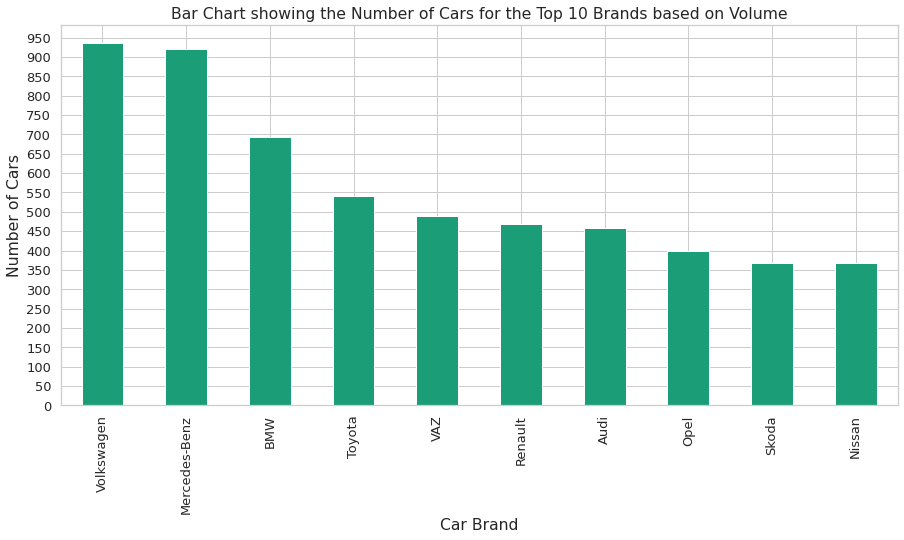

In [0]:
car_value_counts=df_car_sales['car'].value_counts().sort_values(ascending=False)
car_value_counts[:10].plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 1000, 50))

plt.xlabel('Car Brand')
plt.ylabel('Number of Cars')
plt.title('Bar Chart showing the Number of Cars for the Top 10 Brands based on Volume')


- The list of top 10 car brands by volume is **dominated** by foreign car makers.

- **German Brands** like **Volkswagen**, **Mercedes-Benz**, **BMW** and **Audi** take up 4 places.

- **Japanese Brand Toyota** is up at the **4th place**.

- The only one which historically has some roots in Ukraine (as part of USSR), **VAZ** appears in the **5th spot**.

<a id=section50102></a>
### 5.1.2 What are the Top 30 Brands on the basis of Market Share?

Total Market Share of the Top 30 Brands based on Volume :  94.65329991645781 %


Text(0.5, 1.0, 'Horizontal Bar Chart showing the Percentage Market Share of Top 30 Brands (Based on Volume)')

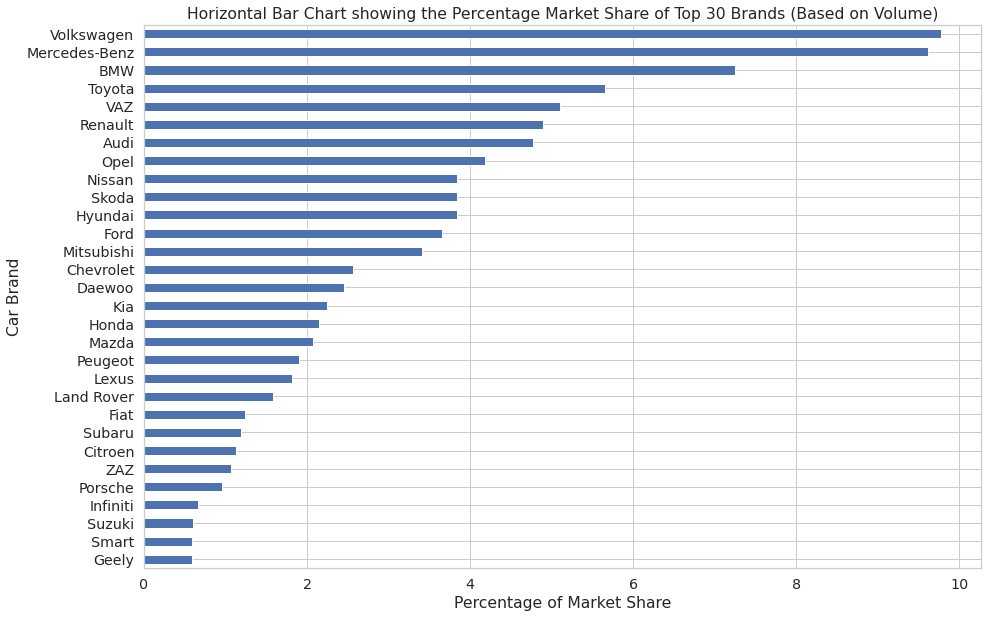

In [0]:
print("Total Market Share of the Top 30 Brands based on Volume : ",((car_value_counts[:30].sum() / len(df_car_sales['car']))*100), "%")
((car_value_counts[:30] / len(df_car_sales['car']))*100).plot.barh(y='car', figsize=(15,10)).invert_yaxis()

plt.xlabel('Percentage of Market Share')
plt.ylabel('Car Brand')
plt.title('Horizontal Bar Chart showing the Percentage Market Share of Top 30 Brands (Based on Volume)')


- Nearly **95%** of the **market share** is in the hands of the top 30 car makers.

- The **market share** is **relatively very high** for the top two brands, **Volkswagen** and **Mercedes-Benz**.

- Then there is **rapid decline** till **Opel**, which is at the **eigth spot**.

- This is followed by a **relatively stable** distribution, upto **Mitsubishi**.

- Finally we get a **steady fall** in distribution for the rest.

<a id=section50103></a>
### 5.1.3 Comparison between the Prices for the Top 5 Brands (by Volume).

Median Price of Volkswagen :  9999.0
Median Price of Mercedes-Benz :  13995.0
Median Price of BMW :  15000.0
Median Price of Toyota :  16500.0
Median Price of VAZ :  2850.0


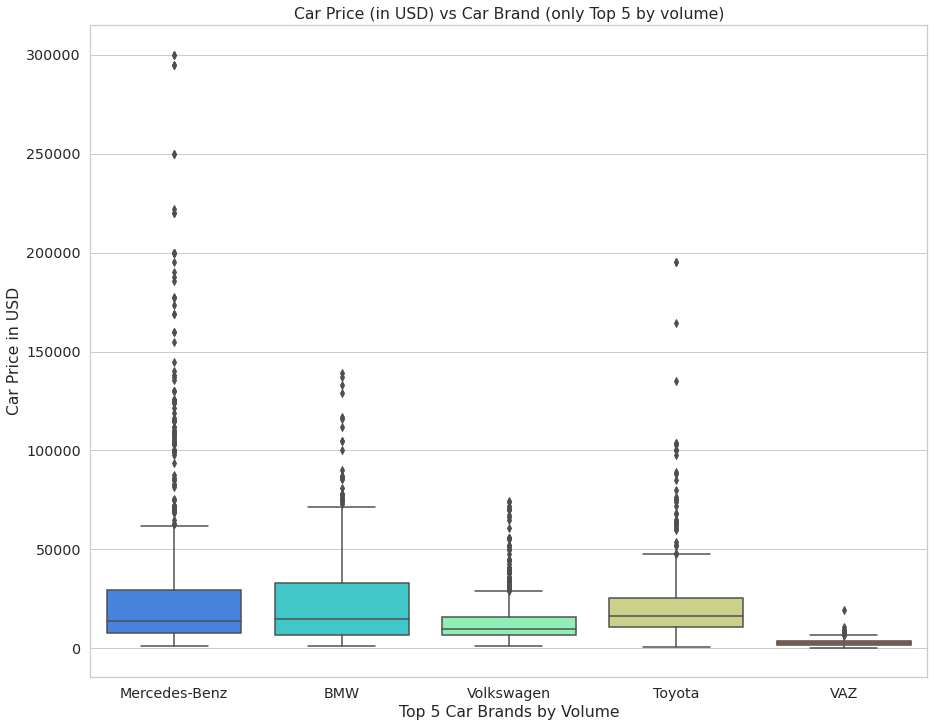

In [0]:
df_top5_car = df_car_sales[(df_car_sales['car']=='Volkswagen') | (df_car_sales['car']=='Mercedes-Benz') | (df_car_sales['car']=='BMW') | (df_car_sales['car']=='Toyota') | (df_car_sales['car']=='VAZ')]

plt.figure(figsize=(15,12))
sns.boxplot(data=df_top5_car, x='car', y='price', palette='rainbow')

plt.xlabel('Top 5 Car Brands by Volume')
plt.ylabel('Car Price in USD')
plt.title('Car Price (in USD) vs Car Brand (only Top 5 by volume)')

car_group=df_car_sales.groupby('car')
car_group_price=car_group.median()['price']
print('Median Price of Volkswagen : ',car_group_price['Volkswagen'])
print('Median Price of Mercedes-Benz : ',car_group_price['Mercedes-Benz'])
print('Median Price of BMW : ',car_group_price['BMW'])
print('Median Price of Toyota : ',car_group_price['Toyota'])
print('Median Price of VAZ : ',car_group_price['VAZ'])


- Comparison of median values reveal that **half** of the **Toyota** cars are **costlier** than the rest, followed by BMW, Mercedes-Benz, Volkswagen and VAZ.

- The range is greatest for Mercedes-Benz. This shows that on comparison of price of individual vehicles, cars from **Mercedes-Benz** are **most expensive**.

- We also note that **VAZ** produces the **most budget friendly** cars followed by Volkswagen amongst these five brands.

<a id=section50104></a>
### 5.1.4 How does distribution vary based on Body Type for two brands in the Top 5?

- To understand the variation in distribution based on Car Body Type, we compare **Mercedes-Benz**, a manufacturer of regular as well as luxury cars and **VAZ**, a maker known for budget friendly cars.

Text(0.5, 1.0, 'Pie chart showing the proportion of each Car Body Type value for Mercedes_Benz')

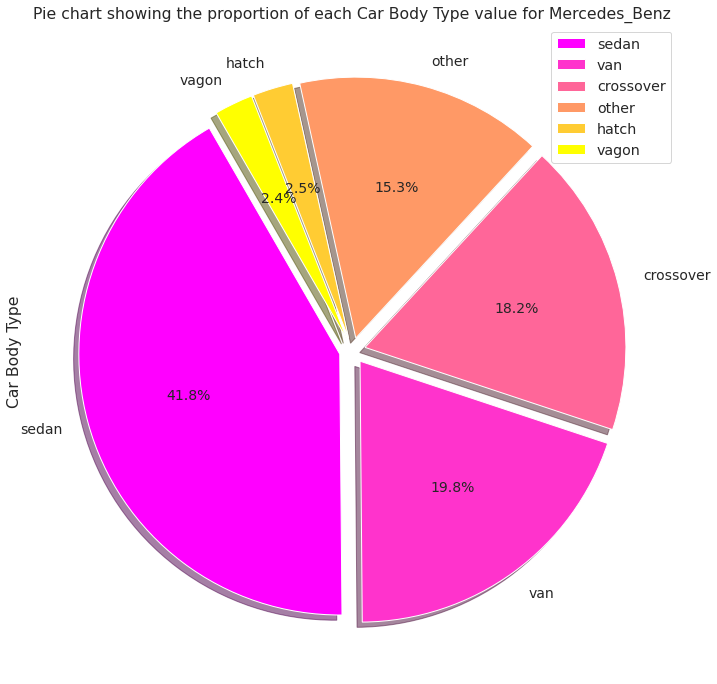

In [0]:
df_car_sales[df_car_sales['car']=='Mercedes-Benz']['body'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05], 
                                                  fontsize=14, autopct='%3.1f%%', figsize=(12,12), shadow=True, startangle=120, legend=True, cmap='spring')

plt.ylabel('Car Body Type')
plt.title('Pie chart showing the proportion of each Car Body Type value for Mercedes_Benz')

Text(0.5, 1.0, 'Pie chart showing the proportion of each Car Body Type value for VAZ')

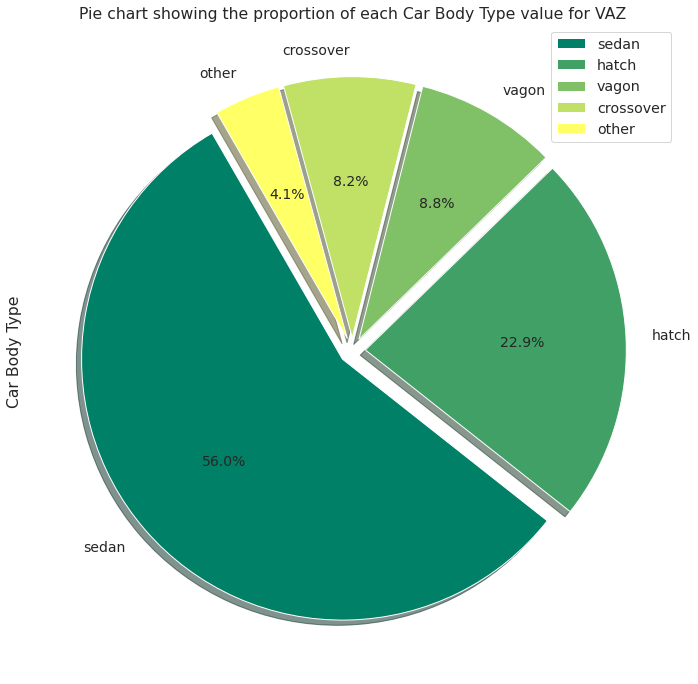

In [0]:
df_car_sales[df_car_sales['car']=='VAZ']['body'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05], 
                                                  fontsize=14, autopct='%3.1f%%', figsize=(12,12), shadow=True, startangle=120, legend=True, cmap='summer')

plt.ylabel('Car Body Type')
plt.title('Pie chart showing the proportion of each Car Body Type value for VAZ')

- Both brands majorly produce sedans.

- **VAZ** manufactures a lot of **hatchbacks** re-enforcing its appeal to the common man.

- Although on basis of manufacturing of **Vagon** and **Hatchback**, **Mercedes-Benz** lags **VAZ**, but in case of **Van** the latter is non existent in the market.

- Percentage of **Crossovers** produced by **Mercedes-Benz** surpasses that of **VAZ** by a significant margin.

- In the **Other** category too, **Mercedes-Benz** is way ahead.


<a id=section50105></a>
### 5.1.5 Categorization on Engine Type for the Top 5 Brands (by Volume).

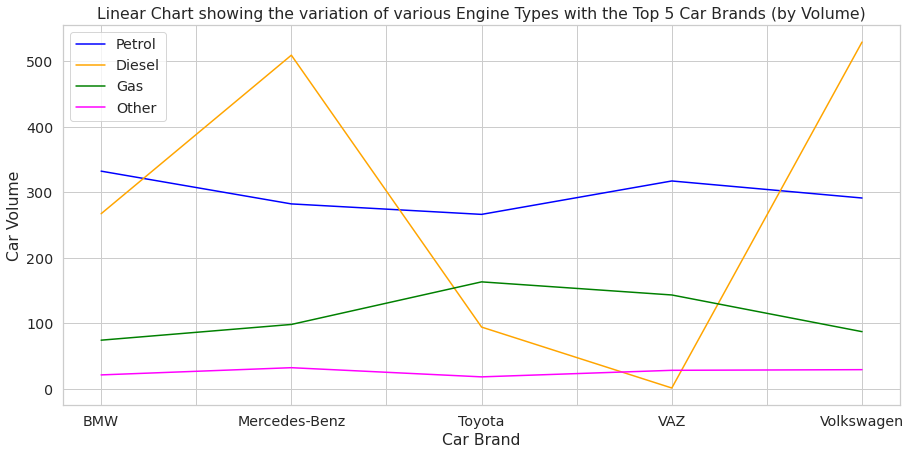

In [0]:
df_top5_car = df_car_sales[(df_car_sales['car']=='Volkswagen') | (df_car_sales['car']=='Mercedes-Benz') | (df_car_sales['car']=='BMW') | (df_car_sales['car']=='Toyota') | (df_car_sales['car']=='VAZ')]
df_top5_car_petrol = df_top5_car[df_top5_car['engType']=='Petrol']
df_top5_car_diesel = df_top5_car[df_top5_car['engType']=='Diesel']
df_top5_car_gas = df_top5_car[df_top5_car['engType']=='Gas']
df_top5_car_other = df_top5_car[df_top5_car['engType']=='Other']

df_top5_car_petrol.groupby('car')['engType'].count().plot(kind='line', figsize=(15, 7), color='blue')
df_top5_car_diesel.groupby('car')['engType'].count().plot(kind='line', figsize=(15, 7), color='orange')
df_top5_car_gas.groupby('car')['engType'].count().plot(kind='line', figsize=(15, 7), color='green')
df_top5_car_other.groupby('car')['engType'].count().plot(kind='line', figsize=(15, 7), color='magenta')

plt.ylabel('Car Volume')
plt.xlabel('Car Brand')
plt.title('Linear Chart showing the variation of various Engine Types with the Top 5 Car Brands (by Volume)')
plt.legend(['Petrol', 'Diesel', 'Gas', 'Other'])


- **Mercedes-Benz** and **Volkswagen** have most of their car engine types as **Diesel**.

- **Toyota** and **VAZ** have similar distribution on basis of car engine types. Mostly they manufacture **Petrol** variants, followed by **Gas** and **Diesel**. This makes them better as **eco-friendly** car brands.

<a id=section502></a>
## 5.2 Analysis Based on Car Price

<a id=section50201></a>
### 5.2.1 Which are the 10 Car Brands with the Most Expensive Fleet of Cars?

In [0]:
car_group=df_car_sales.groupby('car')
car_group_price=car_group.mean()['price']
print(car_group_price.sort_values(ascending=False)[:10])

car
Bentley         198717.125000
Ferrari         167500.000000
Lamborghini     130000.000000
Maserati        110000.000000
Aston Martin    105000.000000
Tesla           99509.090909 
Cadillac        70833.333333 
Rolls-Royce     68900.000000 
Land Rover      52227.649007 
Porsche         47126.347826 
Name: price, dtype: float64


Text(0.5, 1.0, 'Car Price (in USD) vs Car Brands with Most Expensive Fleets (only Top 10)')

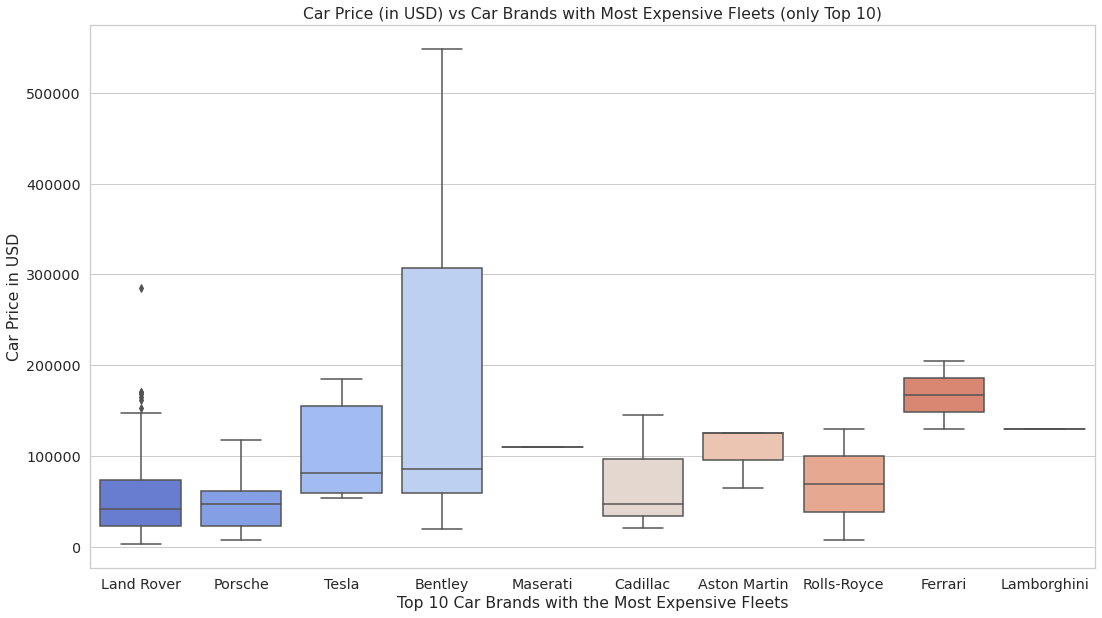

In [0]:
df_top10_car = df_car_sales[(df_car_sales['car']=='Ferrari') | (df_car_sales['car']=='Lamborghini') | (df_car_sales['car']=='Aston Martin') | (df_car_sales['car']=='Maserati') | (df_car_sales['car']=='Bentley')
| (df_car_sales['car']=='Tesla') | (df_car_sales['car']=='Rolls-Royce') | (df_car_sales['car']=='Cadillac') | (df_car_sales['car']=='Porsche') | (df_car_sales['car']=='Land Rover')]

plt.figure(figsize=(18,10))
sns.boxplot(data=df_top10_car, x='car', y='price', palette='coolwarm')

plt.xlabel('Top 10 Car Brands with the Most Expensive Fleets')
plt.ylabel('Car Price in USD')
plt.title('Car Price (in USD) vs Car Brands with Most Expensive Fleets (only Top 10)')


- We take **Average Prices** for each **Brand** to determine the **Top 10 Most Expensive Car Fleets**.

- Amongst all the **Most Expensive** Car Fleets, the **average price is highest** for a **Bentley**, followed by **Ferrari**, **Lamborghini** and **Maserati**.

- Interestingly, **Lamborghini** and **Maserati** have an extremely narrow range, meaning there is **very little variation** in the pricing.

- Going by the **cheaper 50%** of the fleet, **Ferrari** is the **most expensive** of the lot.

<a id=section50202></a>
### 5.2.2 Which is the Costliest and the Cheapest Car Model?

In [0]:
max_car_price = df_car_sales['price'].max()
print(df_car_sales[df_car_sales['price']==max_car_price][['car','model','price','body','engType','year']])

min_car_price = df_car_sales['price'].min()
print(df_car_sales[df_car_sales['price']==min_car_price][['car','model','price','body','engType','year']])

          car     model     price   body engType  year
7621  Bentley  Mulsanne  547800.0  sedan  Petrol  2016
      car model   price   body engType  year
5010  GAZ  21    259.35  sedan  Other   1959


- The **costliest car** is a **sedan** of the name **Mulsanne**, manufactured by **Bentley** in the year **2016**, priced at **$ 547,800.00** and runs only on **petrol**.

- The **cheapest car** is also a **sedan**, manufactured by **GAZ** in the year **1959**, goes by the model **21** and is priced at **$259.35**.

<a id=section50203></a>
### 5.2.3 Study of Price Vs Mileage

Text(0.5, 1.0, 'Regplot showing the variation of Car Price with Car Mileage present in each item')

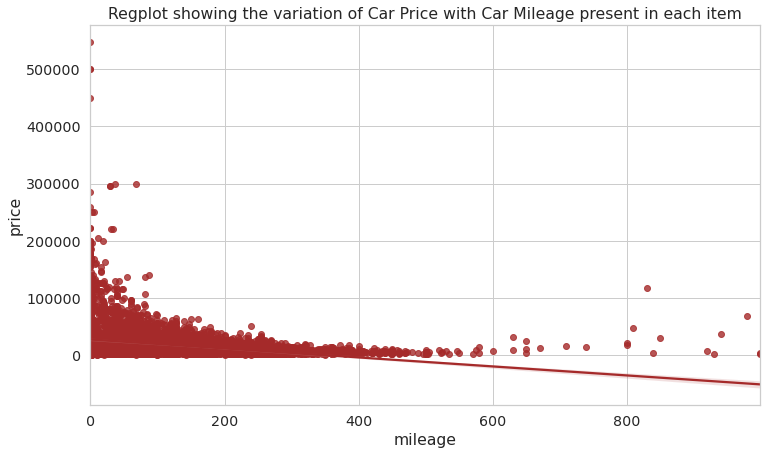

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_car_sales, x='mileage', y='price', color='brown')

plt.title('Regplot showing the variation of Car Price with Car Mileage present in each item')

- From the regression plot displayed, it is observed that there is **negative correlation** between Car Price and Car Mileage.

- This is logical, because in general a car having **higher mileage** is associated with **greater wear and tear** which corresponds to **lower car price**.

- Similarly, **lesser the mileage**, the car is expected to be in a better shape and consequently have a **higher price**.

<a id=section50204></a>
### 5.2.4 Study of Price Vs Engine Volume

In [0]:
print(df_car_sales[['price','engV']].corr())

          price      engV
price  1.000000  0.052266
engV   0.052266  1.000000


Text(0.5, 1.0, 'Regplot showing the variation of Car Price with Car Engine Volume present in each item')

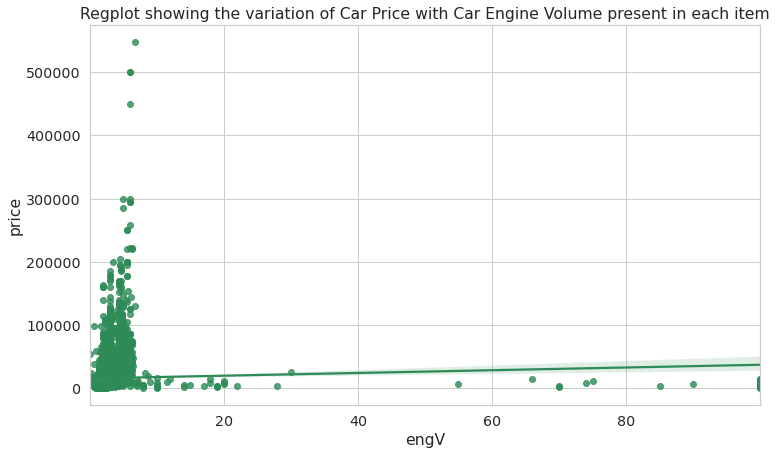

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_car_sales, x='engV', y='price', color='seagreen')

plt.title('Regplot showing the variation of Car Price with Car Engine Volume present in each item')

- The regression plot depicts a **slight positive correlation** between **Car Price** and **Car Engine Volume**. This is verified using the corr() function.

- However, the correlation is quite weak and this insight is not much of a value addition.

<a id=section50205></a>
### 5.2.5 Study of Price Vs Year of Production

In [0]:
print(df_car_sales[['price','year']].corr())

          price      year
price  1.000000  0.380693
year   0.380693  1.000000


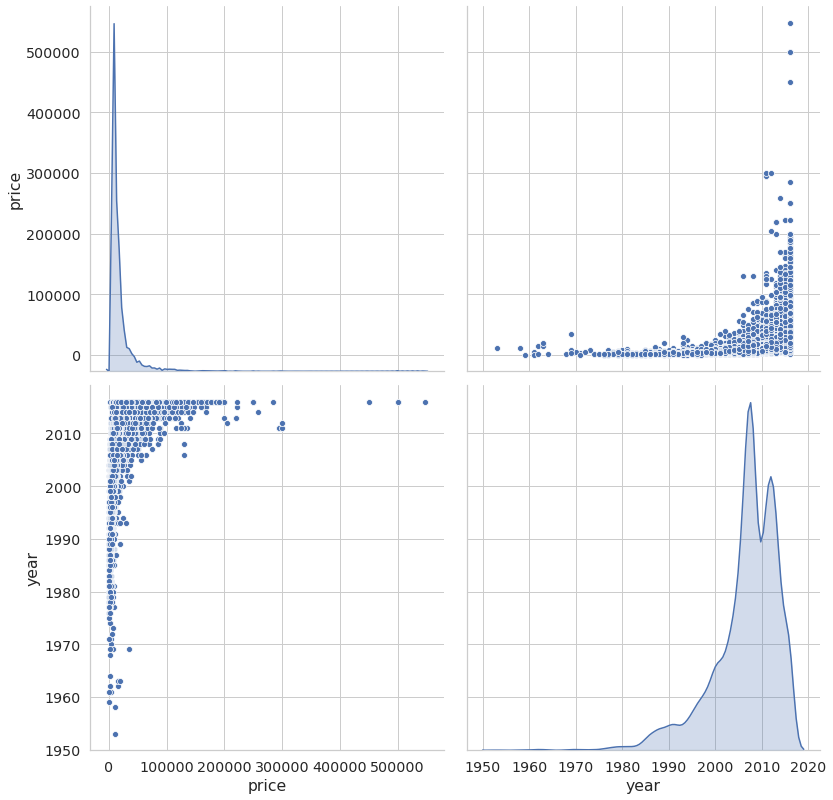

In [0]:
sns.pairplot(data=df_car_sales[['price', 'year']], size=5.5, diag_kind='kde')
#sns.lmplot(x ='engV', y ='price', data = df_car_sales)

- The KDE plot of **Price** indicates that it is **highly right (positively) skewed**. While very **high percentage** of the data is within **100,000 USD**, rare occurances go up to over **500,000 USD**.

- The KDE plot of **Year** shows that the distribution is **left (negatively) skewed**. Majority of the data points appear after the year 1990. There are **two major spikes** after the year 2000, one around **years 2007, 2008** and the second around **years 2011, 2012**.

- The scatter plot between **Price and Year** depicts a **positive correlation** between the two.

- This appears logical, as **recently manufactured cars**, should generally be in a **better condition** and hence quote a **higher price**.

<a id=section50206></a>
### 5.2.6 How is the Price Distribution of Cars for each Drive Category?

Text(0.5, 1.0, 'Car Price (in USD) vs Different Car Drive Category')

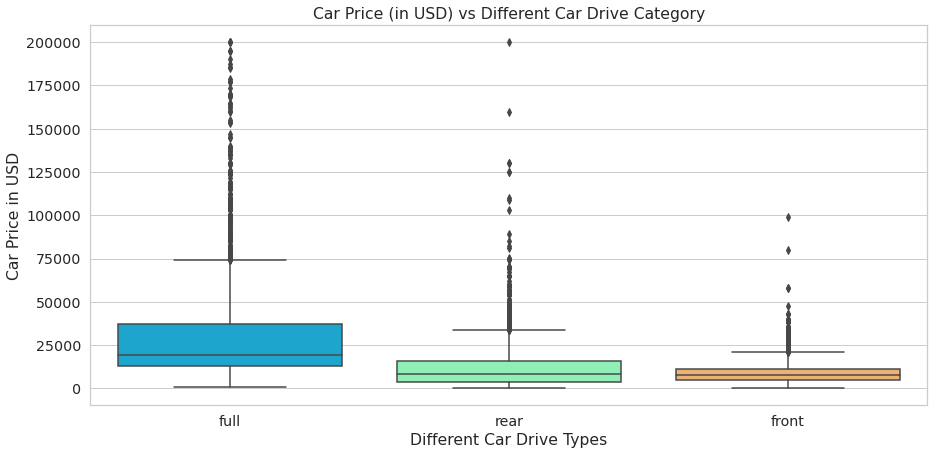

In [0]:
df_car_front = df_car_sales[df_car_sales['drive']=='front']
df_car_full = df_car_sales[df_car_sales['drive']=='full']
df_car_rear = df_car_sales[df_car_sales['drive']=='rear']

df_car_sales.groupby('drive')['price'].count()

plt.figure(figsize=(15,7))
sns.boxplot(data=df_car_sales[df_car_sales['price'] <= 200000], x='drive', y='price', palette='rainbow')

plt.xlabel('Different Car Drive Types')
plt.ylabel('Car Price in USD')
plt.title('Car Price (in USD) vs Different Car Drive Category')


- In this comparison we consider only those cars that have a **price of less than or equal** to **$200,000**. This is because, we are not interested in high end and luxury cars in this case.

- Clearly, cars with drive type as **front** (front wheel drive) are the **cheapest** and has relatively the **lowest range**.

- Cars which have drive type as **full** are **most expensive** and has the **maximum range**.

- Cars with drive type as **rear** are **intermediately priced** and the range is also in between the other two.

<a id=section50207></a>
### 5.2.7 How is the Price Distribution of Budget Hatchbacks based on Engine Type?

Text(0.5, 1.0, 'Box plot showing the variation of Car Price of Budget Hatchbacks for different Engine Type')

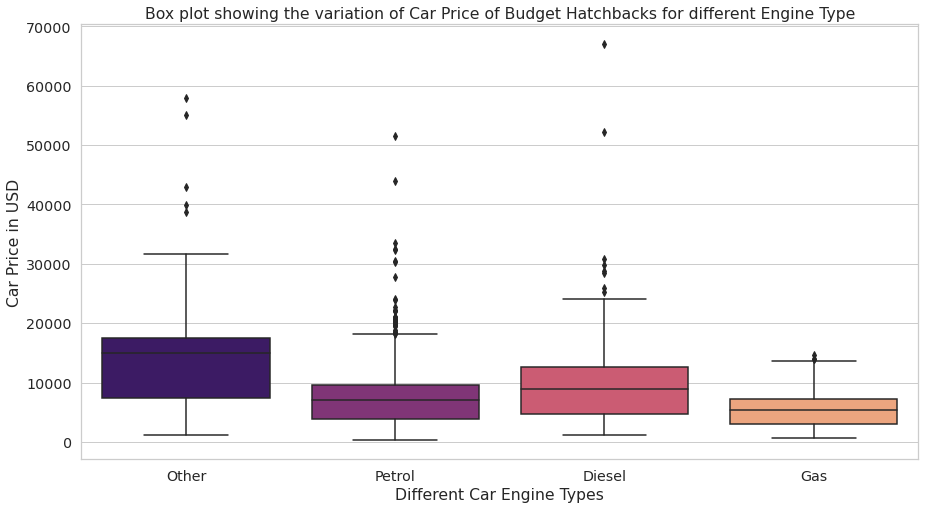

In [0]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_car_sales[(df_car_sales['body'] == 'hatch') & (df_car_sales['price'] <= 100000)], x='engType', y='price', palette='magma')

plt.xlabel('Different Car Engine Types')
plt.ylabel('Car Price in USD')
plt.title('Box plot showing the variation of Car Price of Budget Hatchbacks for different Engine Type')

- We choose the dataset for **budget Hatchbacks** as those with **Price <= 100,000 USD**.

- Hatchbacks with Engine Type as **Gas** are the **cheapest**, followed by **Petrol** and **Diesel** operated ones. Engine Type **Other** is the **costliest** amongst all **budget Hatchbacks**.

<a id=section50208></a>
### 5.2.8 What are the Average Prices of the 10 most common Car Models?

In [0]:
df_car_sales_car_model = df_car_sales.copy()
df_car_sales_car_model['carModel'] = df_car_sales_car_model['model'] + ' (' + df_car_sales_car_model['car'] + ')'
print(df_car_sales_car_model.groupby('carModel')['carModel'].count().sort_values(ascending=False)[:10])


carModel
E-Class (Mercedes-Benz)       199
A6 (Audi)                     172
Camry (Toyota)                134
Vito ïàññ. (Mercedes-Benz)    131
X5 (BMW)                      119
Lanos (Daewoo)                119
Octavia A5 (Skoda)            108
Accord (Honda)                90 
Megane (Renault)              88 
Aveo (Chevrolet)              80 
Name: carModel, dtype: int64


Text(0.5, 1.0, 'Horizontal Bar Chart showing the Average Price of the 10 Most Common Models')

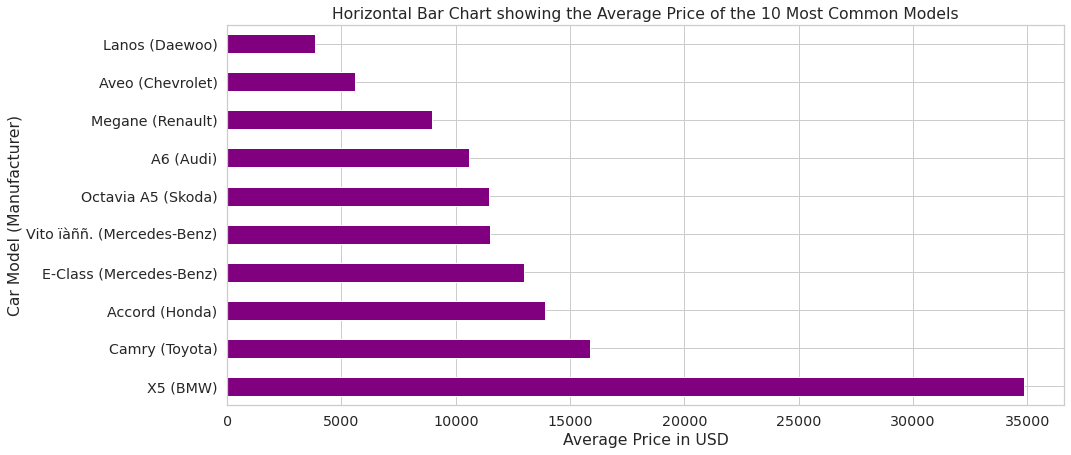

In [0]:
df_top10_car_model = df_car_sales_car_model[(df_car_sales_car_model['carModel']=='E-Class (Mercedes-Benz)') | (df_car_sales_car_model['carModel']=='A6 (Audi)') 
| (df_car_sales_car_model['carModel']=='Camry (Toyota)') | (df_car_sales_car_model['carModel']=='Vito ïàññ. (Mercedes-Benz)') 
| (df_car_sales_car_model['carModel']=='X5 (BMW)') | (df_car_sales_car_model['carModel']=='Lanos (Daewoo)') 
| (df_car_sales_car_model['carModel']=='Octavia A5 (Skoda)') | (df_car_sales_car_model['carModel']=='Accord (Honda)') 
| (df_car_sales_car_model['carModel']=='Megane (Renault)') | (df_car_sales_car_model['carModel']=='Aveo (Chevrolet)')]

df_top10_car_model.groupby('carModel')['price'].mean().sort_values(ascending=False).plot.barh(y='carModel', figsize=(15,7), color='purple')

plt.xlabel('Average Price in USD')
plt.ylabel('Car Model (Manufacturer)')
plt.title('Horizontal Bar Chart showing the Average Price of the 10 Most Common Models')


- To avoid rare scenarios where **a model is manufactured by multiple brands** (Example: Model **Lanos** is produced by both **Daewoo and ZAZ**), we check the model counts on basis of **car-model combinations**.

- **9 out of the 10** most **common car models**, have their average price within **16,000 USD** or just above it.

- An interesting trend is that **models** which are more **common** sometimes have **higher average price**. This shows that when it comes to a model being popular, **price alone is not much of a factor** in Ukraine.

<a id=section503></a>
## 5.3 Analysis Based on Revenue

<a id=section50301></a>
### 5.3.1 Which are the Leading Brands in Terms of Revenue?

Text(0.5, 1.0, 'Revenue of the Leading Car Manufacturers in Percentage out of the Total Revenue')

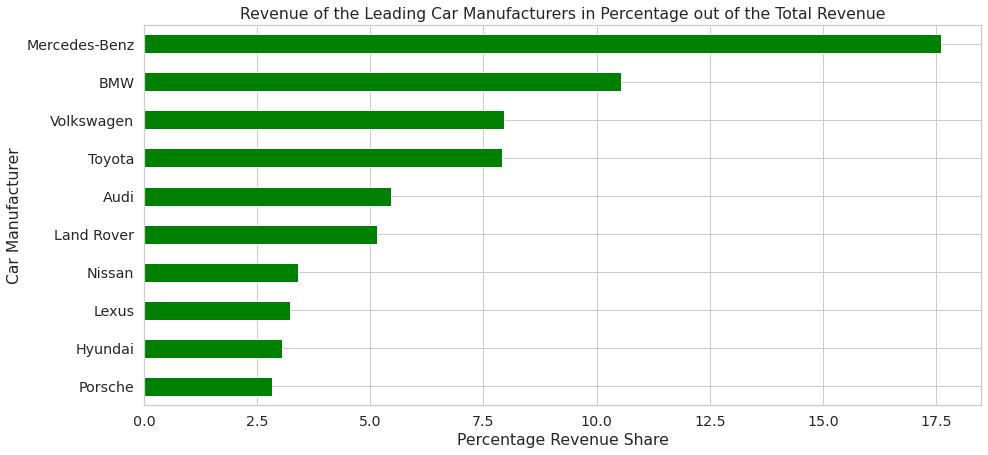

In [0]:
df_car_total_price = df_car_sales.groupby('car')['price'].sum().sort_values(ascending=False)
df_car_revenue_top10 = df_car_total_price.divide(other = df_car_total_price.sum()/100)[:10]
df_car_revenue_top10.plot.barh(y='car', figsize=(15,7), color='green').invert_yaxis()

plt.xlabel('Percentage Revenue Share')
plt.ylabel('Car Manufacturer')
plt.title('Revenue of the Leading Car Manufacturers in Percentage out of the Total Revenue')

- Brands like **Mercedes-Benz**, **BMW**, **Volkswagen** and **Toyota** lead and are in the Top 5 in terms of **Highest Revenue**, just like they dominated market share.

- **VAZ** is absent from the top 10 list.

- **Renault**, **Opel** and **Skoda** also lose out their places in the top 10.

- Rival brands like **Land Rover**, **Lexus**, **Hyundai** and **Porche** claim the remaining spots.

Text(0.5, 1.0, 'Donut Plot showing the Individual Share out of the Total Revenue of the Top 10 Leading Car Brands')

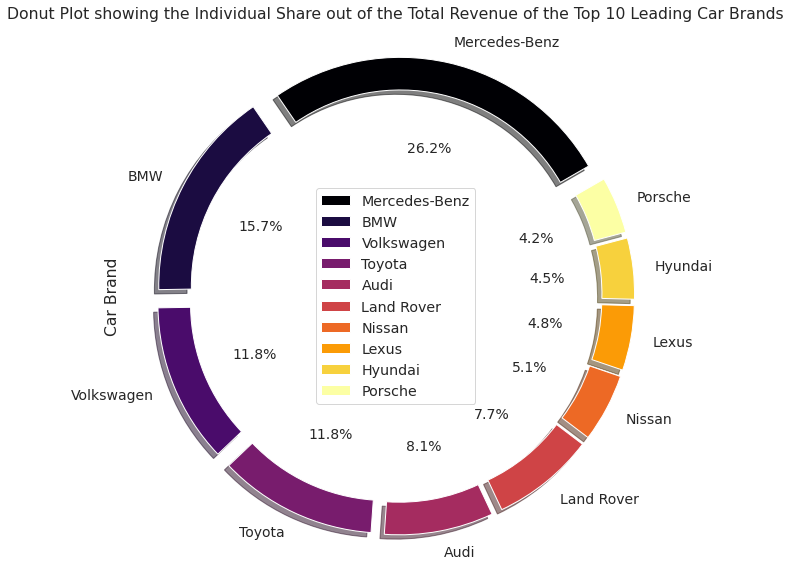

In [0]:
space = np.ones(10)/10
df_car_revenue_top10.plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=30, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('Car Brand')
plt.title('Donut Plot showing the Individual Share out of the Total Revenue of the Top 10 Leading Car Brands')

- Here we compare the **relative dominance** in revenue amongst the 10 leading Car Brands **in Terms of Revenue**.

<a id=section50302></a>
### 5.3.2 How are the Leading Brands in Terms of Revenue distributed by Engine Type?

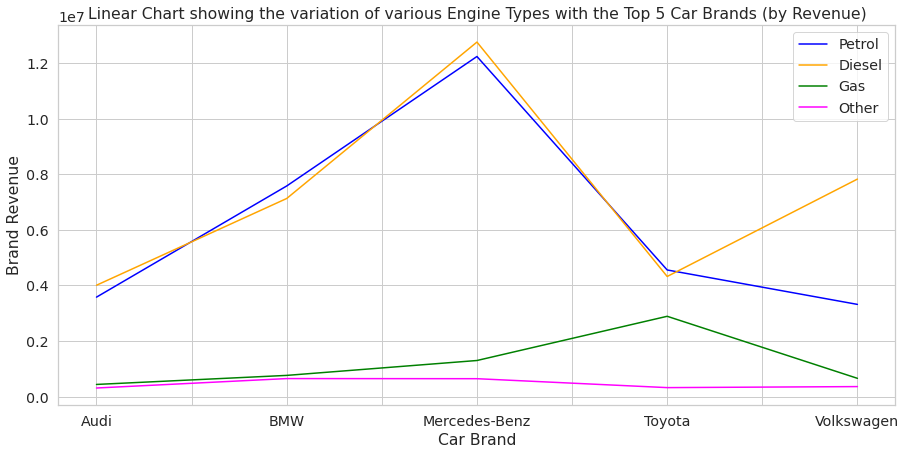

In [0]:
df_top5_car = df_car_sales[(df_car_sales['car']=='Volkswagen') | (df_car_sales['car']=='Mercedes-Benz') | (df_car_sales['car']=='BMW') | (df_car_sales['car']=='Toyota') | (df_car_sales['car']=='Audi')]
df_top5_car_petrol = df_top5_car[df_top5_car['engType']=='Petrol']
df_top5_car_diesel = df_top5_car[df_top5_car['engType']=='Diesel']
df_top5_car_gas = df_top5_car[df_top5_car['engType']=='Gas']
df_top5_car_other = df_top5_car[df_top5_car['engType']=='Other']

df_top5_car_petrol.groupby('car')['price'].sum().plot(kind='line', figsize=(15, 7), color='blue')
df_top5_car_diesel.groupby('car')['price'].sum().plot(kind='line', figsize=(15, 7), color='orange')
df_top5_car_gas.groupby('car')['price'].sum().plot(kind='line', figsize=(15, 7), color='green')
df_top5_car_other.groupby('car')['price'].sum().plot(kind='line', figsize=(15, 7), color='magenta')

plt.ylabel('Brand Revenue')
plt.xlabel('Car Brand')
plt.title('Linear Chart showing the variation of various Engine Types with the Top 5 Car Brands (by Revenue)')
plt.legend(['Petrol', 'Diesel', 'Gas', 'Other'])


- **Diesel** and **Petrol** cars go almost neck-to-neck for 4 out of the top 5 brands when in comes to **Revenue**.

- **Gas** and **Other** engine types consistently occupy the 3rd and 4th spot respectively.

- For **Toyota**, engine type **Gas** is in some contention with the two leading engine types.

<a id=section50303></a>
### 5.3.3 Brands of which countries dominate the share of Revenue?

carCountry
Germany        47.284059
Japan          22.959077
France         6.761026 
USA            6.453417 
UK             5.360933 
South Korea    4.766163 
Czech          2.598173 
Italy          1.679465 
China          0.933402 
India          0.774023 
Ukraine        0.225882 
Russia         0.191242 
Iran           0.006209 
Sweden         0.004576 
Romania        0.002353 
Name: price, dtype: float64
97.86231306832599


Text(0.5, 1.0, 'Revenue of the Countries of Car Manufacturer in Percentage out of the Total Revenue')

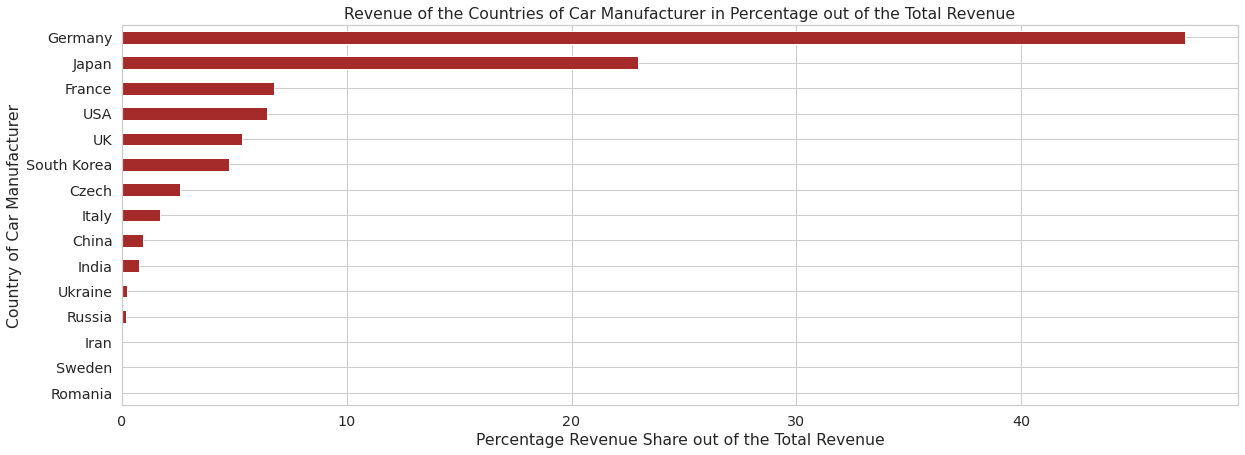

In [0]:
def carCountryMap(str):
  Germany = ['Mercedes-Benz', 'BMW', 'Volkswagen', 'Audi', 'Porsche', 'Bentley', 'Smart', 'Seat', 'MINI', 'Rolls-Royce', 'Lamborghini', 'Other-Retro', 'Barkas']
  Italy = ['Fiat', 'Jeep', 'Ferrari', 'Dodge', 'Chrysler', 'Maserati', 'Alfa Romeo', 'Lancia']
  USA = ['Ford', 'Chevrolet', 'Tesla', 'Daewoo', 'Cadillac', 'Hummer', 'Lincoln', 'GMC', 'Fisker', 'Mercury', 'Buick']
  Japan = ['Toyota','Nissan','Lexus','Mitsubishi','Honda','Mazda','Infiniti','Subaru', 'Suzuki', 'Acura', 'Isuzu', 'Daihatsu']
  UK = ['Land Rover', 'Aston Martin']
  South_Korea = ['Hyundai','Kia']
  Czech = ['Skoda']
  France = ['Renault','Opel','Peugeot','VAZ','Citroen', 'Dacia', 'Samsung', 'Wartburg']
  India = ['SsangYong', 'Jaguar', 'Rover', 'TATA', 'Groz']
  China = ['Volvo', 'Geely', 'Chery', 'Great Wall', 'BYD', 'MG', 'Lifan', 'Dadi', 'Huanghai', 'ZX', 'Hafei', 'Changan', 'FAW', 'SMA', 'JAC']
  Ukraine = ['ZAZ', 'Bogdan']
  Russia = ['GAZ', 'UAZ', 'ËUAZ', 'Moskvich-AZLK', 'Moskvich-Izh']
  Iran = ['Samand']
  Sweden = ['Saab']
  Romania = ['Aro']

  if str in Germany:
    return 'Germany'
  elif str in Italy:
    return 'Italy'
  elif str in USA:
    return 'USA'
  elif str in Japan:
    return 'Japan'
  elif str in UK:
    return 'UK'
  elif str in South_Korea:
    return 'South Korea'
  elif str in Czech:
    return 'Czech'
  elif str in France:
    return 'France'
  elif str in India:
    return 'India'
  elif str in China:
    return 'China'
  elif str in Ukraine:
    return 'Ukraine'
  elif str in Russia:
    return 'Russia'
  elif str in Iran:
    return 'Iran'
  elif str in Sweden:
    return 'Sweden'
  elif str in Romania:
    return 'Romania'
  else:
    return 'NA'

df_car_country = df_car_sales[['car','price']].copy()
df_car_country['carCountry'] = df_car_sales['car'].apply(carCountryMap)

df_car_country_revenue = df_car_country.groupby('carCountry')['price'].sum().sort_values(ascending=False)

df_car_country_revenue_percent = df_car_country_revenue.divide(other = df_car_country_revenue.sum()/100)
print(df_car_country_revenue_percent)
print(df_car_country_revenue_percent[:8].sum())
df_car_country_revenue_percent.plot.barh(y='carCountry', figsize=(20,7), color='brown').invert_yaxis()

plt.xlabel('Percentage Revenue Share out of the Total Revenue')
plt.ylabel('Country of Car Manufacturer')
plt.title('Revenue of the Countries of Car Manufacturer in Percentage out of the Total Revenue')


- **Germany** and **Japan** dominate the revenue with **% shares** of **47.28** and **22.96** respectively. **Car Brands** from **these two** countries take home **over 70%** of the **total revenue**.

- **France**, **USA** and **UK** claim the **3rd, 4th and 5th** spots with **6.76%, 6.45% and 5.36% of the total revenue** respectively.

- Next comes the **2nd Asian** country, **South Korea** with a revenue share of **4.77%**.

- The **7th and 8th** places are claimed by **Czech** and **Italy** with **2.6% and 1.7% revenue** respectively.

- Interestingly, **China and India** too have significant shares of **revenue** with **0.93% and 0.77%** respectively.

- The **11th place** is occupied by **Ukraine**. The nation itself has a **mere 0.23% of the total revenue**.

- **In 12th,** we have **Russia** with **0.19%** share followed by **Iran, Sewden and Romania** with revenue shares of **even less than 0.01% for each**.



Text(0.5, 1.0, 'Donut Plot for Individual Share out of the Total Revenue of the Top 8 Leading Countries of Car Brands')

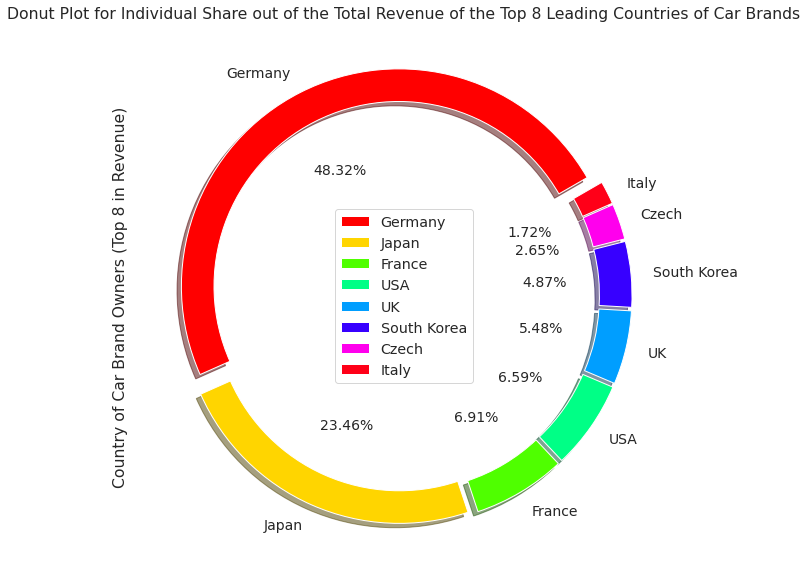

In [0]:
space = np.ones(8)/20
df_car_country_revenue[:8].plot(kind='pie', explode=space, fontsize=14, autopct='%3.2f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=30, figsize=(10,10), cmap='hsv', legend=True)

plt.legend(loc='center')
plt.ylabel('Country of Car Brand Owners (Top 8 in Revenue)')
plt.title('Donut Plot for Individual Share out of the Total Revenue of the Top 8 Leading Countries of Car Brands')

- Following the findings from the previous section, we select the **Top 8 Leading Countries** who dominate in terms of their **shares of the total revenue**.

- Then, we draw a comparative study of the **shares of these Countries**, out of the total **97.86% of the revenue** that they bag.

- Hence the **percentages** depicted **rise slightly**, compared to the previous graph. But for the **big picture of the comparison of shares** this gives a much **better insight**.

- We conclude that **Germany dominates hugely** and **European Countries** dominate in general with **5 places out of the Top 8**.

- **Japan** also does really well and **South Korea** joins them in the list as the **only two Asian Countries**.

<a id=section504></a>
## 5.4 Analysis Based on Year, Drive, Engine and Body Type

<a id=section50401></a>
### 5.4.1 Yearly Distribution of Car Volume based on Engine Types from the Year 2000.

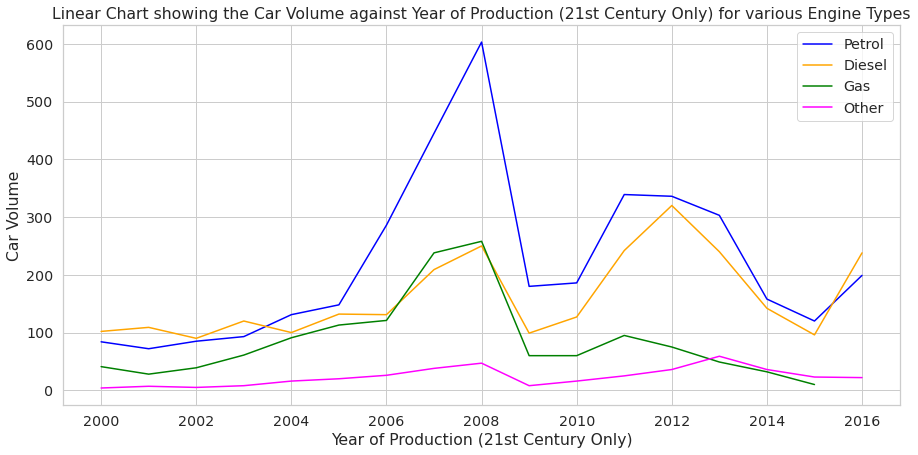

In [0]:
df_car_sales[df_car_sales['year']>=2000].groupby('year')['car'].count().sort_values(ascending=False)
df_car_2000 = df_car_sales[df_car_sales['year']>=2000]

df_car_2000[df_car_2000['engType']=='Petrol'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='blue')
df_car_2000[df_car_2000['engType']=='Diesel'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='orange')
df_car_2000[df_car_2000['engType']=='Gas'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='green')
df_car_2000[df_car_2000['engType']=='Other'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='magenta')

plt.ylabel('Car Volume')
plt.xlabel('Year of Production (21st Century Only)')
plt.title('Linear Chart showing the Car Volume against Year of Production (21st Century Only) for various Engine Types')
plt.legend(['Petrol', 'Diesel', 'Gas', 'Other'])


- Overall, there is a significant **rise in car volume** from the year **2007**, which reaches its **peak in 2008**. Right after this, there is a steep fall and years **2009 and 2010** hit much **lower numbers**.

- From **2004** and onwards, **Petrol** cars have consistently **dominated** in numbers. Year **2016** appears to be an exception.

- From **2010** volume of **Diesel** cars have given close competition to **Petrol** cars.

- There is a rapid fall in number for **Gas** cars from **2008** to **2009**. However, unlike **Petrol** or **Diesel**, the **numbers never improve** much and then there is **steady decline from 2011**.

<a id=section50402></a>
### 5.4.2 Yearly Distribution of Car Volume based on Drive Type from the Year 2000.

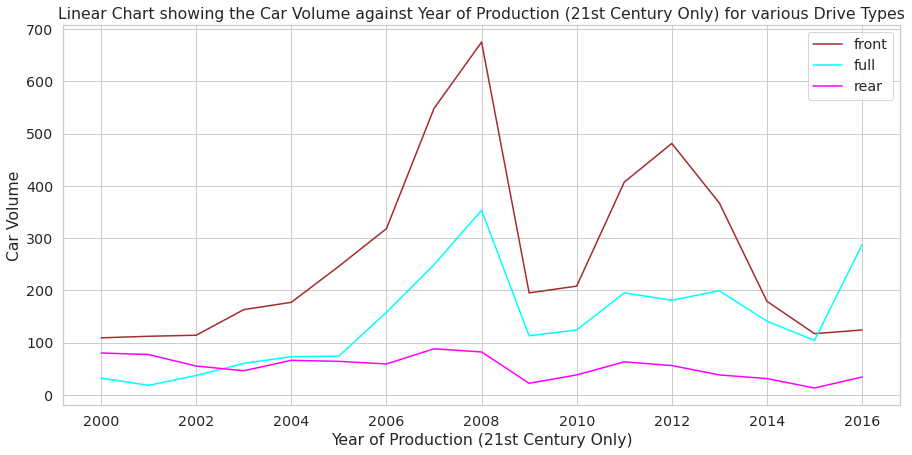

In [0]:
df_car_2000 = df_car_sales[df_car_sales['year']>=2000]

df_car_2000[df_car_2000['drive']=='front'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='brown')
df_car_2000[df_car_2000['drive']=='full'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='cyan')
df_car_2000[df_car_2000['drive']=='rear'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='magenta')

plt.ylabel('Car Volume')
plt.xlabel('Year of Production (21st Century Only)')
plt.title('Linear Chart showing the Car Volume against Year of Production (21st Century Only) for various Drive Types')
plt.legend(['front', 'full', 'rear'])


- Cars with Drive type as **Front** always **lead the race** convincingly, except for the year **2016**.

- For most of the years, from **2004 and onwards** Drive type **Full** takes the **second place**. In **2016** however it is maximum in number.

- Cars with Drive type as **Rear** is always least in number from **2004 and onwards**.

<a id=section50403></a>
### 5.4.3 Yearly Distribution of Car Volume based on Engine Volume from the Year 2000.

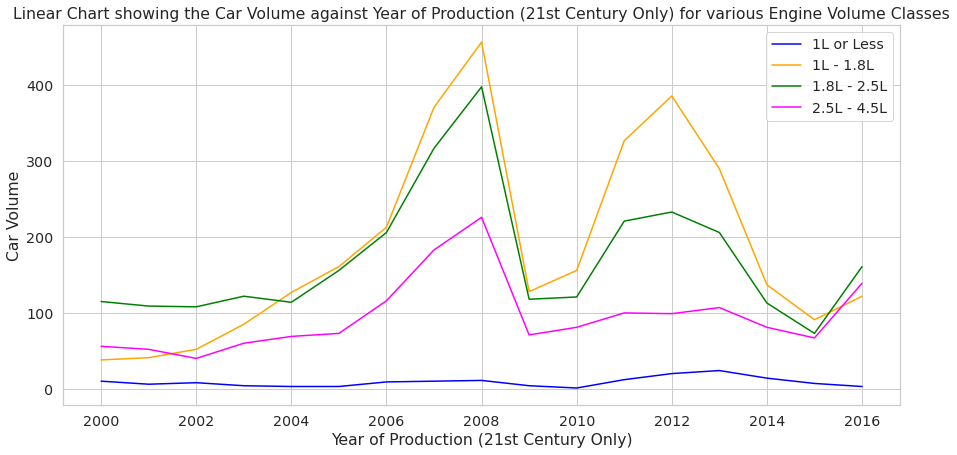

In [0]:
df_car_engV = df_car_sales[(df_car_sales['year']>=2000) & (df_car_sales['engV']<=4.5)][['car','engV','year']]
df_car_engV['engVClass'] = df_car_engV['engV'].apply(lambda x : '1L or Less' if x <= 1 else ('1L - 1.8L' if x > 1 and x <= 1.8 else ('1.8L - 2.5L' if x > 1.8 and x <= 2.5 else '2.5L - 4.5L')))

df_car_engV[df_car_engV['engVClass']=='1L or Less'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='blue')
df_car_engV[df_car_engV['engVClass']=='1L - 1.8L'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='orange')
df_car_engV[df_car_engV['engVClass']=='1.8L - 2.5L'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='green')
df_car_engV[df_car_engV['engVClass']=='2.5L - 4.5L'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='magenta')

plt.ylabel('Car Volume')
plt.xlabel('Year of Production (21st Century Only)')
plt.title('Linear Chart showing the Car Volume against Year of Production (21st Century Only) for various Engine Volume Classes')
plt.legend(['1L or Less', '1L - 1.8L', '1.8L - 2.5L', '2.5L - 4.5L'])


- From the year **2004** till **2015** the distribution is very much unifrom in the sense, **cars with Engine Volumes** between **1L - 1.8L** are the **most popular**, followed by the class **1.8L - 2.5L** and **2.5L - 4.5L** respectively.

- Cars with Engine Volumes in the range of **1L or Less** are **least popular** all throughout. These are generally the small city cars and hatchbacks.

<a id=section50404></a>
### 5.4.4 Yearly Distribution of Car Volume based on Car Body from the Year 2000.

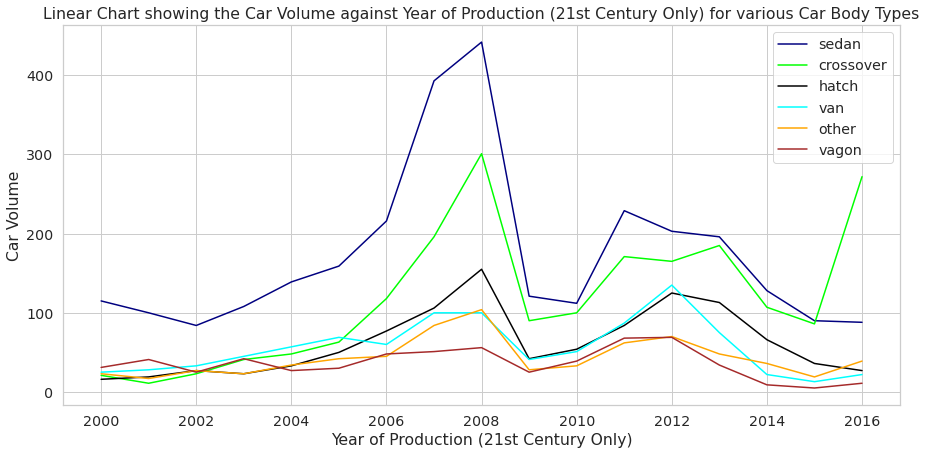

In [0]:
df_car_sales[df_car_sales['year']>=2000].groupby('year')['car'].count().sort_values(ascending=False)
df_car_2000 = df_car_sales[df_car_sales['year']>=2000]

df_car_2000[df_car_2000['body']=='sedan'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='navy')
df_car_2000[df_car_2000['body']=='crossover'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='lime')
df_car_2000[df_car_2000['body']=='hatch'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='black')
df_car_2000[df_car_2000['body']=='van'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='cyan')
df_car_2000[df_car_2000['body']=='other'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='orange')
df_car_2000[df_car_2000['body']=='vagon'].groupby('year')['car'].count().plot(kind='line', figsize=(15, 7), color='brown')

plt.ylabel('Car Volume')
plt.xlabel('Year of Production (21st Century Only)')
plt.title('Linear Chart showing the Car Volume against Year of Production (21st Century Only) for various Car Body Types')
plt.legend(['sedan', 'crossover', 'hatch', 'van', 'other', 'vagon'])


- **Sedan** have always been the **most produced** type in Ukraine till **2015**.

- **Crossovers** have slowly gained popularity, and from **2005 onwards** has been second best only to sedans. The **year 2016** is significant, because this is the first year when **production of crossover** was **nearly thrice** as that **of sedan**.

- **Hatchbacks** and **Vans** are the **next most produced** varieties for major part of the 21st century, giving close competition to eachother between **years 2005 to 2016**.

- Types **Other** and **Vagon** are generally **low in number post 2004**. There are exceptions like years **2008** and **2014-2016**.

<a id=section50405></a>
### 5.4.5 Price Range for various Drive Types in each of the 2 Most Popular Car Body Category.

Text(0.5, 1.0, 'Price vs Drive for Regular Sedans & Crossovers')

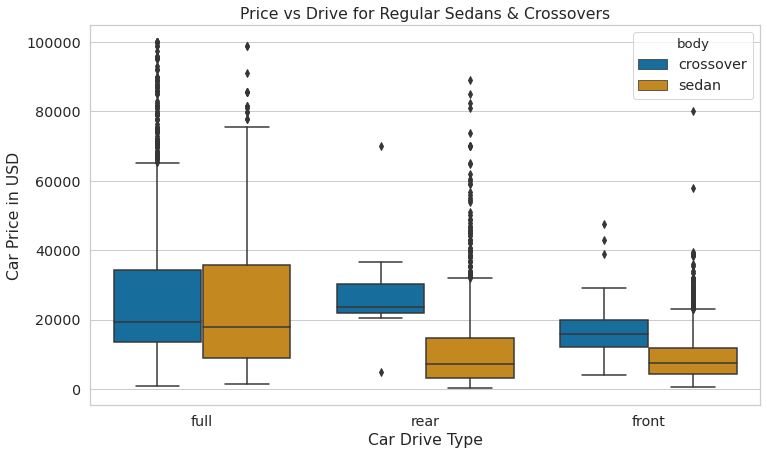

In [0]:
df_car_sedan_cross = df_car_sales[((df_car_sales['body']=='sedan') | (df_car_sales['body']=='crossover')) & (df_car_sales['price']<=100000)]
plt.figure(figsize=(12,7))
sns.boxplot(data=df_car_sedan_cross, x='drive', y='price', palette='colorblind', hue='body')

plt.ylabel('Car Price in USD')
plt.xlabel('Car Drive Type')
plt.title('Price vs Drive for Regular Sedans & Crossovers')

- We are aware that **Sedans** and **Crossovers** are the **2 most popular** car body categories. As a boundary for regular cars, we consider the **price <= 100,000 USD** to be **regular**.

- Cars with **Drive Type Front** are the **cheapest** while **Full** is the **costliest** type.

- In general, **Sedans** are **cheaper than Crossovers**.

- For **Drive Type Front**, **75% Sedans** are priced at a lower or equal price as the **Cheapest 25% Crossovers**.

- In case of **Drive Type Rear**, about **80% Sedans** are cheaper than the **cheapest available Crossover**.

- Interestingly, for **Drive Type Full**, **Sedans** have a **wider range of price**. So only in this segment we have **Sedans competing with Crossovers** in the market of costly cars.

Text(0.5, 1.0, 'Price vs Drive for Luxury Sedans & Crossovers')

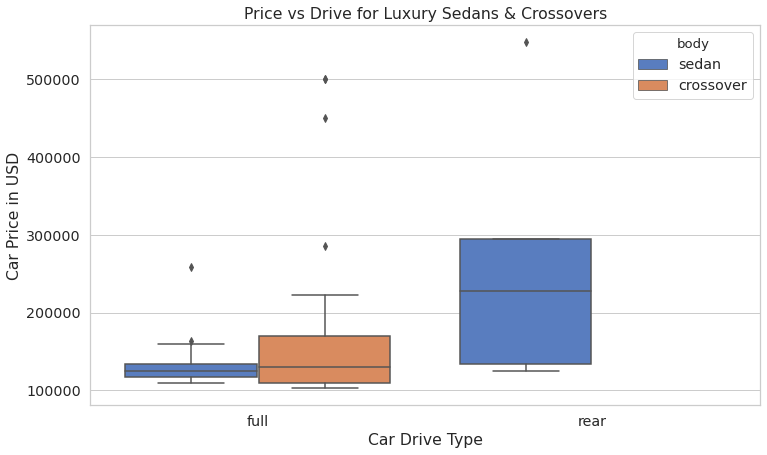

In [0]:
df_car_sedan_cross = df_car_sales[((df_car_sales['body']=='sedan') | (df_car_sales['body']=='crossover')) & (df_car_sales['price']>100000)]
plt.figure(figsize=(12,7))
sns.boxplot(data=df_car_sedan_cross, x='drive', y='price', palette='muted', hue='body')

plt.ylabel('Car Price in USD')
plt.xlabel('Car Drive Type')
plt.title('Price vs Drive for Luxury Sedans & Crossovers')

- All Sedans and Crossovers priced **higher than 100,000 USD** are studied as **luxury**.

- Notably, in this segment, **Drive Type Front does not exist** at all.

- **Crossovers** are only available as **Drive Type Full**.

- Contrary to the regular car segment, in case of luxury, **Crossovers** have a **larger price range**.

<a id=section50406></a>
### 5.4.6 Distribution of Car Body Category Based on Drive Type.

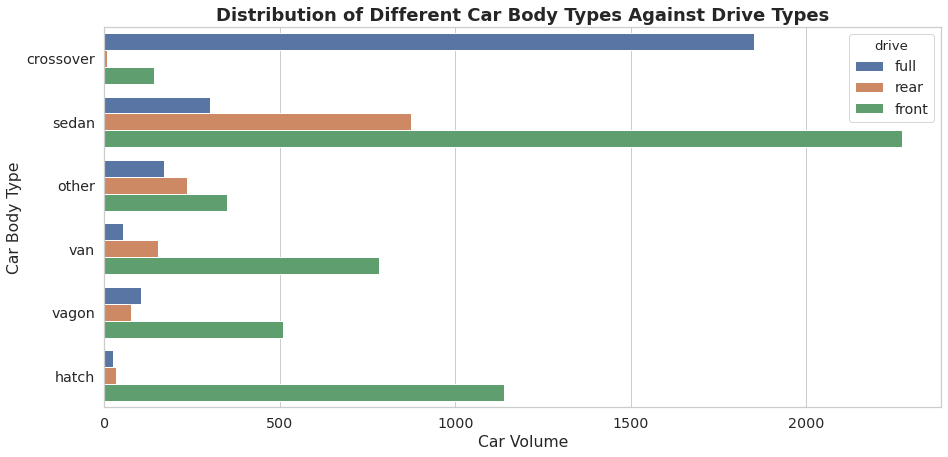

In [0]:
plt.figure(figsize=(15,7))
sns.countplot(y="body", hue="drive", data=df_car_sales)
plt.title("Distribution of Different Car Body Types Against Drive Types",fontsize=18,fontweight="bold")
plt.ylabel("Car Body Type")
plt.xlabel("Car Volume")
plt.show()

- **Except Crossover**, all other Car Body Types, have an overwhelming dominance of **Front** Drive Type.

- For **Crossovers**, Drive Type **Full** has the **highest numbers**.

- **Rear** Drive Type is **second** in terms of volume for most Car Body Types like **Sedan**, **Van**, **Hatch** and **Other**.

- **Vagon** Car Body Type has **All** Drive Type as the second highest in number after **Front**.

<a id=section50407></a>
### 5.4.7 Price Range for various Engine Types in each of the 2 Most Popular Car Body Category.

Text(0.5, 1.0, 'Price vs Engine Type for Regular Sedans & Crossovers')

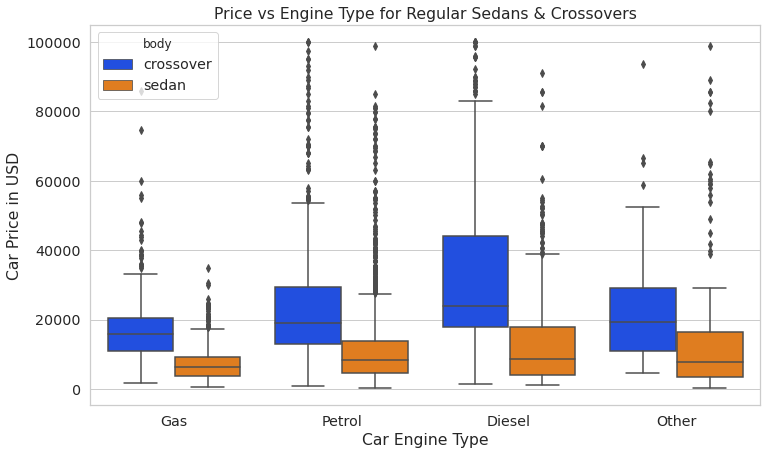

In [0]:
df_car_sedan_cross = df_car_sales[((df_car_sales['body']=='sedan') | (df_car_sales['body']=='crossover')) & (df_car_sales['price']<=100000)]
plt.figure(figsize=(12,7))
sns.boxplot(data=df_car_sedan_cross, x='engType', y='price', palette='bright', hue='body')

plt.ylabel('Car Price in USD')
plt.xlabel('Car Engine Type')
plt.title('Price vs Engine Type for Regular Sedans & Crossovers')

- We are aware that **Sedans** and **Crossovers** are the **2 most popular** car body categories. As a boundary for regular cars, we consider the **price <= 100,000 USD** to be **regular**.

- For the Engine types of **Gas**, **Petrol** and **Diesel**, almost **75% Sedans** are priced at a lower or equal price as the **Cheapest 25% Crossovers**. We found a similar trend during our analysis based on Car Drive Types.

- Overall, **Diesel** Engine cars have **highest Price Range**.

- For **Crossovers**, **50%** of **Diesel** Engine Cars are **Costliest** followed by Engine Types of **Other**, **Petrol** and then **Gas**.

- For **Sedans**, **50%** of **Diesel** Engine Cars are **Costliest** followed by Engine Types of **Petrol**, **Other** and then **Gas**.

- Hence, irrespective of Car Body, **Gas Engine** Cars are the **cheapest**.

- The **Costlier Crossovers** tend to have **Diesel** engine more often.


Text(0.5, 1.0, 'Price vs Engine Type for Luxury Sedans & Crossovers')

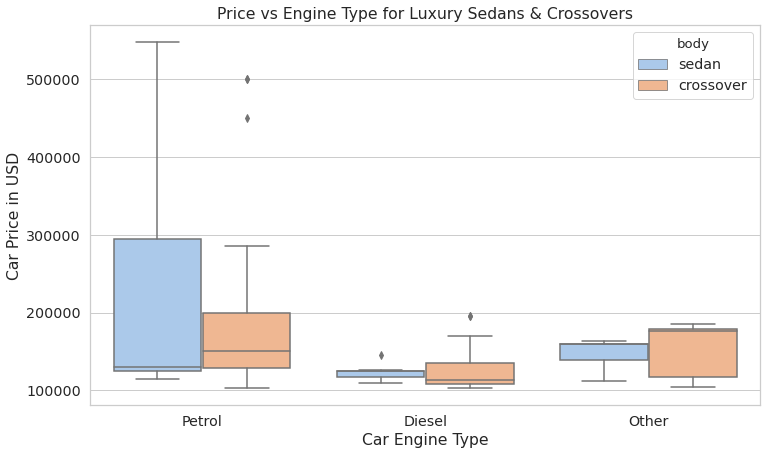

In [0]:
df_car_sedan_cross = df_car_sales[((df_car_sales['body']=='sedan') | (df_car_sales['body']=='crossover')) & (df_car_sales['price']>100000)]
plt.figure(figsize=(12,7))
sns.boxplot(data=df_car_sedan_cross, x='engType', y='price', palette='pastel', hue='body')

plt.ylabel('Car Price in USD')
plt.xlabel('Car Engine Type')
plt.title('Price vs Engine Type for Luxury Sedans & Crossovers')

- All Sedans and Crossovers priced **higher than 100,000 USD** are studied as **luxury**.

- In the **Luxury** segment we find that **Petrol** is the Engine Type for the majority of the Cars.

- Amongst **Petrol** Engine Cars, we have **Sedans** with much greater **Price Range** compared to **Crossovers**. In fact, almost all **Cars Priced Greater than 300,000 USD** are **Sedans** that run on **Petrol Engines**.

- In case of **Diesel** and **Other** Engine Types, **Crossovers** again have a **greater range of Price**.

- **Gas** Engine Type is totally absent from the plot, proving that in the **Luxury** segment, there is no place for Cars with **Gas Engine Types**.

<a id=section6></a>
## 6. Summary

- From the Car Sales Dataset of Ukraine from 2016, we have been able to get a picture of the trends and pattern of the automobile industry. The major findings are listed below.


<a id=section601></a>
### 6.1 Summary for Car Volume Analysis


- In terms of **Market Share**, the **Top 2 Brands**, **Volkswagen** and **Mercedes-Benz lead** by a big margin and are followed by **BMW, Toyota and VAZ** completing the **Top 5 list**.

- Amongst these Top 5, **most expensive** and high-end cars are manufactured by **Mercedes-Benz**. Considering **full price ranges** of the car fleets, **50%** of the **Toyota** cars are **priced higher than 50% of the cars** produced by each of the **other brands**. **VAZ** produces the **most budget friendly** cars followed by **Volkswagen**.

- We compare **Body Type distribution** for **Mercedes-Benz (2nd spot)** and **relatively expensive** vs **VAZ (5th spot)**, very **economically priced**.

> > - **VAZ** produces higher number of **Sedans and Hatchbacks**, which makes it a **hit** 
as a **budget friendly** brand. 

> > - **Percentage of Crossovers** produced by **Mercedes-Benz surpasses** that of **VAZ** by a significant margin. VAZ being an economic Car Maker is yet to make it big in the Crossover segment (exanding fast). 

> > - **Unlike VAZ**, more **popular Brands** like Mercedes-Benz have there **presence in many other Car Body segments** like Van.

- When analysed based on Engine Type, **Mercedes-Benz and Volkswagen** (top 2 in terms of market share) have **most** of their **Car Engines as Diesel**. Amongst the Top 5, **Toyota and VAZ** are the relatively **greener Car Brands**, having a **big number of Cars** with **Petrol Engines** and much fewer with Diesel.

<a id=section602></a>
### 6.2 Summary for Car Price Analysis

- **Very high percentage** of the cars are priced below **100,000 USD**.

- Amongst all the **Most Expensive Car Fleets**, the **average price** is **highest** for a **Bentley**, followed by **Ferrari, Lamborghini and Maserati**. Based on **entry level** lowest available price, **Ferrari** is the **most expensive**.

- The **more mileage** of a car, generally the **lesser** is **the price** (Negative Correlation).

- **Car prices** analysed **against year of production**, revealed that **recently manufactured** cars have a **higher price** (Positive Correlation). Years **2007-2008** and **2011-2012** witnessed the **highest car productions**.

- **Drive types** in **decreasing order of price** : **Full > Rear > Front**

- **Hatchbacks** based on **engine type** in **decreasing order of price** : **Diesel > Petrol > Gas**

- **9 out of the 10 most common car models**, have their **average price within 16,000 USD** or just above it.

- **Top 3 most common car models** in decreasing order : **E-Class (Mercedes-Benz), A6 (Audi), Camry (Toyota)**. However, **Top 3** in **decreasing order of average price** among the **most common car models** : **X5 (BMW), Camry (Toyota), Accord (Honda)**.


<a id=section603></a>
### 6.3 Summary for Revenue Analysis

- Brands like **Mercedes-Benz, BMW, Volkswagen and Toyota lead** and are in the **Top 5** in terms of **Highest Revenue**, just like they dominated market share. **VAZ is absent from** the **Top 10** list.

- **Diesel and Petrol cars** go almost neck-to-neck and **together dominate** in number for **4 out of the Top 5** brands (in revenue).

- Brands from **Germany and Japan** account for the **biggest shares** with a **combined 70% of the total market revenue**, with 47.28% and 22.96% respectively.

- **European Countries** dominate in general with **5 places out of the Top 8**. **Ukraine is 11th** in the list with a **mere 0.23% of the total revenue**.

<a id=section604></a>
### 6.4 Summary for Multidimensional Analysis

- **Car volume** is studied across **all years from 2000** against multiple factors.

> > - **Engine Types** - From 2004 and onwards, **Petrol cars have consistently dominated** in numbers, **except 2016**, when it was **overtaken by Diesel**, its closest competitor.

> > - **Drive Types** - **Front** always **leads** the race **convincingly**, **except** for the year **2016**, when **Full**, generally coming second, came first.

> > - **Engine Volume** - From **2004 till 2015**, cars with Engine Volumes between **1L - 1.8L are the most popular**, followed by the **class 1.8L - 2.5L and 2.5L - 4.5L** respectively.

> > - **Car Body** - **Sedan** have always been the **most produced** type in Ukraine **till 2015**. From **2005 Crossovers** have been **second best**, but in **2016 overtook Sedan**.

- **Distribution** of **Car Body** Category **Based on Drive Type** revealed the below.

> > - **Except Crossover**, **all other Car Body** Types, have an **overwhelming dominance of Front Drive** Type.

> > - **For Crossovers**, Drive Type **Full** has the **highest numbers**.

- **Price Range** for various **Drive Types** - **Sedan vs Crossover**

> > - In regular car segment, **Sedans** are **cheaper** than **Crossovers**. Cars with **Drive Type Front** are the **cheapest** while **Full** is the **costliest** type. 

> > - In the luxury segement, **Drive Type Front does not exist** at all.**Crossovers** are **only** available **as Drive Type Full**.

- **Price Range** for various **Engine Types** - **Sedan vs Crossover**

> > - In regular segment, **75% Sedans** are **priced** at a **lower or equal** price as the **Cheapest 25% Crossovers**. The **Costlier Crossovers** tend to have **Diesel engine more often**.

> > - In the Luxury segment, we find that **Petrol** is the Engine Type for the **majority of the Cars**. Amongst **Petrol Engine Cars**, we have **Sedans** with much **greater Price Range** compared to **Crossovers**. **Gas Engine Type** is totally **absent**.

<a id=section7></a>
## 7. Conclusion


- The **Top 5 Car Brands** in **descending** order of **Market Share** : Volkswagen > Mercedes-Benz > BMW > Toyota > VAZ.

- **Toyota** and **VAZ** are **greener** options, while the **leaders** have **Diesel Engine** domination.

- **VAZ** is **budget friendly** brand for **city cars** and **small family cars** while **Mercedes-Benz** shows dominance in **Crossovers and Vans**.

- Very **high percentage** of all the cars in the dataset are **priced below 100,000 USD**.

- **9 out of the 10 most common car models**, have their **average price within 16,000 USD** or just above it.

- The **more mileage** of a car, generally the **lesser** is **the price** (Negative Correlation).

- **Drive types** in **decreasing order of price** : **Full > Rear > Front**

- **Car Volume** was **highest** in **2007-2008** followed by a **steep decline** in **2009-2010**, this is probably due to the effect of the **Global Recession**.

- Brands like **Mercedes-Benz, BMW, Volkswagen and Toyota lead** and are in the **Top 5** in terms of **Highest Revenue**, just like they dominated market share. **VAZ is absent from** the **Top 10** list.

- Brands from **Germany** have an **overwhelming** share of **revenue**, followed by **Japan** while **Ukraine** has a share of very **little significance**.

- In terms of **earning revenue** for top brands, both **Petrol** and **Diesel** are doing **great**.

- In **21st century** patterns have been generally uniform with **2016** being a major exception. There was sudden rise of **Diesel** engines over **Petrol**, **Full** drive beat **Front** and **Crossovers** dominated **Sedans**.

- One of the reasons for this is, **Crossovers** are primarily **Full** Drive instead of **Front** unlike **Sedans**.

- In regular car segment, generally **75% Sedans** are **priced** at a **lower or equal** price as the **Cheapest 25% Crossovers**. The **costlier Crossovers** tend to have **Diesel engines** and **Sedans** can compete with the price of **Crossovers** for drive type **Full**.

- In luxury car segment, drive type **Front** does not exist. The **most expensive** of the lot are all **Sedans** that run on **Petrol** engine.

<a id=section701></a>
### 7.1 Actionable Insights

- The **most dominant** car **brands in Ukraine**, top the lists for **both market share** as well as **revenue**. However, except these 5-6 brands others are able to perform well only in one of the lists. So for a **new brand** it would be wise to focus on **either improving market share or revenue** and not both at the same time.

- Manufacturing a lot of **Sedans and Hatchbacks** can **improve market share** but to **improve in revenue** a car brand has to **invest in** trending body types such as **Crossovers**.

- We have noticed that **9 out of the 10 most popular car models** have **average prices** around **16,000 USD**. So when launching a **new model** this **price segment** can be **tagetted**.

- When launching a **new Sedan**, to keep it **cheaper**, we should have **Petrol** engine and the Drive type should be **Front**. To make it costly and **competitive with Crossovers**, Drive type has to be **Full** and a **Diesel** engine.

- **New car brands from Asian countries** should be **encouraged** to enter the Ukrainian automobile industry, seeing the dominance of **Japan** and **South Korea** in the Top 8 list of leading countries in terms of revenue and the noticable presence of **China** and **India**.

- The year **2016** saw a lot of major trends being broken and the future seems very bright for **Crossovers**.
